In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
file = "Resources/merged_data.csv"

data = pd.read_csv(file)
data.head()

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
0,Afghanistan,2020,54771898.0,38928341.0,2.011614e+10,516.747871
1,Albania,2020,12904896.0,2837849.0,1.513187e+10,5332.160475
2,Algeria,2020,201992285.0,43851043.0,1.450092e+11,3306.858208
3,Angola,2020,84297733.0,32866268.0,5.361907e+10,1631.431691
4,Antigua and Barbuda,2020,215545.0,97928.0,1.370281e+09,13992.744480


Looking for the top 5 max and min populations

In [4]:
data["Population Size"].min()

10834.0

In [5]:
data.loc[data["Population Size"] == data["Population Size"].min()]

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
105,Nauru,2020,11426.0,10834.0,1.146266e+08,10580.268188


In [6]:
# found this from https://stackoverflow.com/questions/59477797/how-to-find-top-n-minimum-values-from-the-dataframe-python-3
data.nsmallest(5, "Population Size")

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
105,Nauru,2020,11426.0,10834.0,1.146266e+08,10580.268188
157,Tuvalu,2020,73782.0,11792.0,5.505471e+07,4668.818743
50,Faroe Islands,2020,76282.0,48865.0,3.240760e+09,66320.679198
95,Marshall Islands,2020,23062.0,59194.0,2.444624e+08,4129.850998
41,Dominica,2020,320279.0,71991.0,5.042148e+08,7003.859021


In [7]:
bottom5 = data.nsmallest(5, "Population Size")
bottom5

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
105,Nauru,2020,11426.0,10834.0,1.146266e+08,10580.268188
157,Tuvalu,2020,73782.0,11792.0,5.505471e+07,4668.818743
50,Faroe Islands,2020,76282.0,48865.0,3.240760e+09,66320.679198
95,Marshall Islands,2020,23062.0,59194.0,2.444624e+08,4129.850998
41,Dominica,2020,320279.0,71991.0,5.042148e+08,7003.859021


In [8]:
data["Population Size"].max()

7763932702.0

In [9]:
data.loc[data["Population Size"] == data["Population Size"].max()]

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
164,World,2020,4.926536e+10,7.763933e+09,8.490681e+13,10936.057466


In [10]:
# need to drop world row since it is not a country
data.drop([164], axis=0, inplace=True)
data.max()

Country                    Zimbabwe
Year                           2020
Value                  8615244017.0
Population Size        1411100000.0
2020 GDP in USD    14687673892882.0
GDP Per Capita        116356.158037
dtype: object

In [11]:
data.loc[data["Population Size"] == data["Population Size"].max()]

# now it looks good

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
32,China,2020,8.615244e+09,1.411100e+09,1.468767e+13,10408.669756


In [12]:
top5 = data.nlargest(5, "Population Size")
top5

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
32,China,2020,8.615244e+09,1.411100e+09,1.468767e+13,10408.669756
69,India,2020,2.472701e+09,1.380004e+09,2.667688e+12,1933.101069
70,Indonesia,2020,4.127112e+09,2.735236e+08,1.058689e+12,3870.557620
116,Pakistan,2020,1.804460e+09,2.208923e+08,3.003063e+11,1359.514522
20,Brazil,2020,2.881277e+09,2.125594e+08,1.448566e+12,6814.875632


In [13]:
bottom5

,Country,Year,Value,Population Size,2020 GDP in USD,GDP Per Capita
105,Nauru,2020,11426.0,10834.0,1.146266e+08,10580.268188
157,Tuvalu,2020,73782.0,11792.0,5.505471e+07,4668.818743
50,Faroe Islands,2020,76282.0,48865.0,3.240760e+09,66320.679198
95,Marshall Islands,2020,23062.0,59194.0,2.444624e+08,4129.850998
41,Dominica,2020,320279.0,71991.0,5.042148e+08,7003.859021


In [14]:
print(f'The top 5 most populous countries are: China, India, Indonesia, Pakistan and Brazil')
print(f'The bottom 5 most populous countries are: Nauru, Tuvalu, Faroe Islands, Marshall Islands and Dominica')

The top 5 most populous countries are: China, India, Indonesia, Pakistan and Brazil
The bottom 5 most populous countries are: Nauru, Tuvalu, Faroe Islands, Marshall Islands and Dominica


In [15]:
top5.dtypes

Country             object
Year                 int64
Value              float64
Population Size    float64
2020 GDP in USD    float64
GDP Per Capita     float64
dtype: object

In [48]:
# drop_scientific_not = top5["Value"].round(9)
# drop_scientific_not

In [16]:
x_axis = np.array(top5["Country"])
x_axis

y_axis = np.array(top5["Value"])
y_axis

array([8.61524402e+09, 2.47270061e+09, 4.12711205e+09, 1.80446048e+09,
       2.88127739e+09])

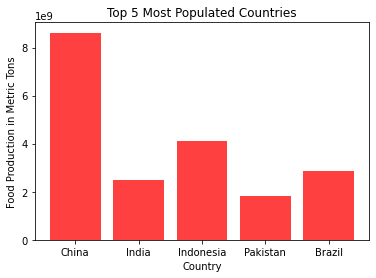

In [17]:
# metric tons is equivalent to tonnes
plt.title("Top 5 Most Populated Countries")
plt.xlabel("Country")
plt.ylabel("Food Production in Metric Tons")

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.show()

In [18]:
x2_axis = np.array(bottom5["Country"])
x2_axis

y2_axis = np.array(bottom5["Value"])
y2_axis

array([ 11426.,  73782.,  76282.,  23062., 320279.])

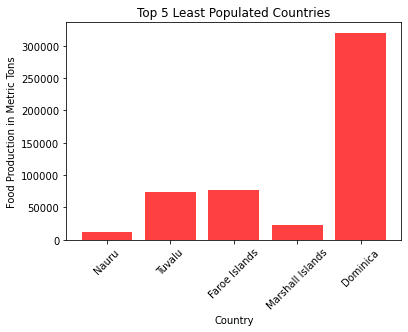

In [19]:
plt.title("Top 5 Least Populated Countries")
plt.xlabel("Country")
plt.ylabel("Food Production in Metric Tons")
plt.xticks(rotation=45)
plt.bar(x2_axis, y2_axis, facecolor="red", alpha=0.75, align="center")
plt.show()